<!Doctype html>
<html>
<head>
<body>
     주제 질문:<div style="text-align:left"><font size="5" ,font color ="blue", align= right>북한의 삶은 우리가 학교에서 듣고 배운것처럼 정말 힘든가? </font></div></body></head></html>

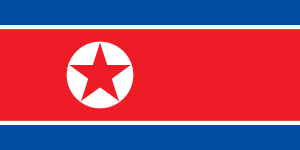

주제 선정 계기: 우리는 어렸을 때부터 북한에 대해 안좋은 이미지를 가지는 것으로 배웠다. 북한은 독재 체제이며 경제가 어렵고, 사람들이 먹을 음식이 부족하는 등 아주 힘들다고 배웠다. 하지만, 북한도 마찬가지로 남한에 대해서 남한의 삶은 힘들다고 교육시킨다고한다. 이번 기회에 중립적인 입장에서 편견 없이, 순수하게 몇가지 데이터를 통해서 북한의 삶을 객관적으로 평가해보려고 한다.

## 목차



## 1. 북한의 의사, 약사 수
## 2. 북한의 결핵 예방율 결핵 예방률
## 3. 북한의 질환별 사망자 수
## 4. 북한의 C02 배출량
## 5. 북한 사람들의 영양 공급 실태
## 6. 북한 사람들의 기대 수명
## 7. 북한의 1인당 소득량과 경제 성장률

In [37]:

import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

## 공평한 비교를 위해 남한과 북한의 인구 비율을 알아보자

In [53]:
population = pd.read_csv("NK인구.csv", encoding ="cp949",index_col="시점")
population


,북한,남한,남북한
시점,,,
2001,22902,47370,70272
2002,23088,47645,70733
2003,23254,47892,71147
2004,23411,48083,71493
2005,23561,48185,71746
2006,23707,48438,72145
2007,23849,48684,72532
2008,23934,49055,72989
2009,24062,49308,73370


In [54]:
population["남한"]/population["북한"]

시점
2001    2.068378
2002    2.063626
2003    2.059517
2004    2.053864
2005    2.045117
2006    2.043194
2007    2.041343
2008    2.049595
2009    2.049206
2010    2.048787
2011    2.054344
2012    2.055103
2013    2.054553
2014    2.057700
2015    2.058800
2016    2.057196
2017    2.053330
2018    2.053438
2019    2.047881
2020    2.041194
dtype: float64

평균이 2.05 정도이고 표준편차가 0.007로 아주 작아서 평균값 2.05는 사용 가능할 듯 하다.

In [55]:
(population["남한"]/population["북한"]).describe()

count    20.000000
mean      2.052808
std       0.007173
min       2.041194
25%       2.048560
50%       2.053651
75%       2.057322
max       2.068378
dtype: float64

## 북한은 의사가 많을까요?

In [38]:
doctor = pd.read_csv("NK의사약사수.csv",encoding="cp949")
doctor



,시점,북한,북한.1,남한,남한.1,남한.2,남한.3,남한.4,남한.5
0,시점,합계,인구만명당 의·약사수,합계,의사,치과의사,한의사,약사,인구만명당 의·약사수
1,2001,72332,31.6,158848,75295,18887,12794,51872,33.5
2,2002,...,...,165111,78609,19672,13662,53168,34.7
3,2003,...,...,170708,81328,20446,14553,54381,35.6
4,2004,...,...,170683,81998,20772,14421,53492,35.5
5,2005,...,...,177050,85369,21581,15271,54829,36.7
6,2006,...,...,182244,88214,22267,15918,55845,37.6
7,2007,...,...,188509,91475,23126,16732,57176,38.7
8,2008,...,...,194916,95088,23924,17541,58363,39.7
9,2009,77481,32.2,201191,98434,24639,18401,59717,40.8


In [56]:
SKdoctor=doctor["남한"][9:]
NKdoctor=doctor["북한"][9:]
SKdoctor=SKdoctor.astype("float")
SKdoctor=SKdoctor/2.05




# 북한과 남한의 의사 약사 수 비교

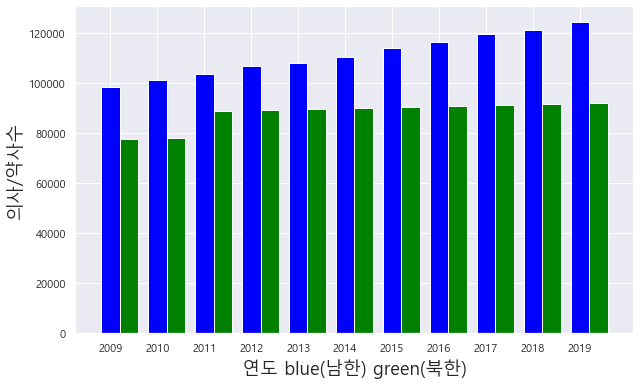

In [110]:
x1 = np.arange(len(NKdoctor))
x2 = np.arange(len(SKdoctor))
# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))
SKdoctor1 = SKdoctor.astype("int64")
NKdoctor1 = NKdoctor.astype("int64")
# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x1, SKdoctor1, color = 'blue', width = w, align = 'center')
plt.bar(x2 + w, NKdoctor1, color='green', width = w, align = 'center')##기존 그래프 폭 만큼 이동

# 최적 위치에 범례 배치
dd = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
plt.xticks(range(0,len(SKdoctor)), dd)

plt.xlabel('연도 blue(남한) green(북한)', fontsize=18)

plt.ylabel('의사/약사수', fontsize=18)



plt.grid(True)

의사 약사수에는 남한이 많기는 하지만 큰 차이는 보지 못했다.

Text(0, 0.5, '예방률')

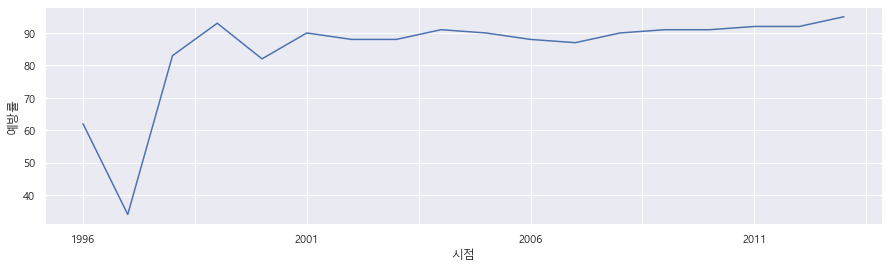

In [127]:
결핵=pd.read_csv("NK결핵.csv",encoding="cp949",index_col=["시점"]).iloc[1:].astype(float)
결핵preventention=결핵["북한.4"]
결핵preventention.plot(kind='line',rot=0,figsize=(15,4))
plt.ylabel("예방률")

In [58]:
disease = pd.read_csv("NK질환병사망자수.csv", encoding ="cp949",index_col="국가별")
T=disease.T
T["남한"]=T["남한"]/2.052
T

국가별,북한,남한
"2000,암",29016,31299.707602
"2000,심혈관질환",42904,33600.389864
"2000, 당뇨병",1601,6010.233918
"2000,만성호흡기질환",16579,7521.442495
"2005,암",33108,35242.202729
"2005,심혈관질환",64823,32767.543860
"2005, 당뇨병",2316,6563.840156
"2005, 만성호흡기질환",23812,6459.551657
"2010, 암",37641,38439.571150
"2010, 심혈관질환",78316,30344.054581


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

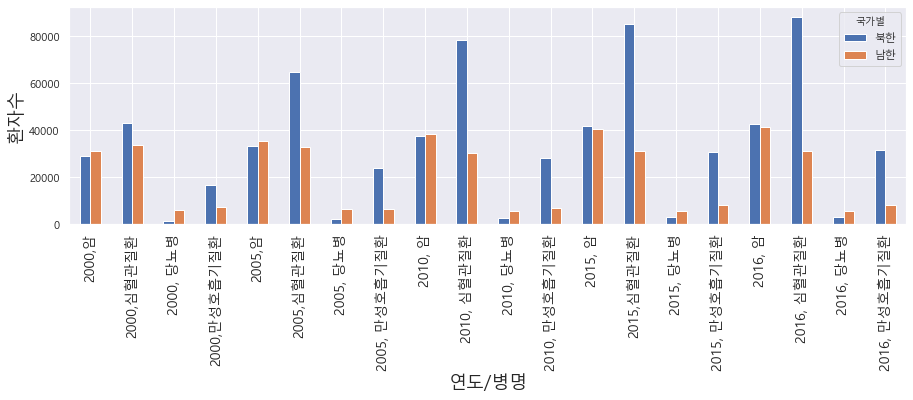

In [59]:


T.plot(kind='bar', rot=0, figsize=(15,4))

plt.xlabel('연도/병명', fontsize=18)

plt.ylabel('환자수', fontsize=18)

plt.xticks(fontsize=14, rotation=90)


북한이 남한보다 더 높은 비율로 걸리는 질병은 무엇이 있을까?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

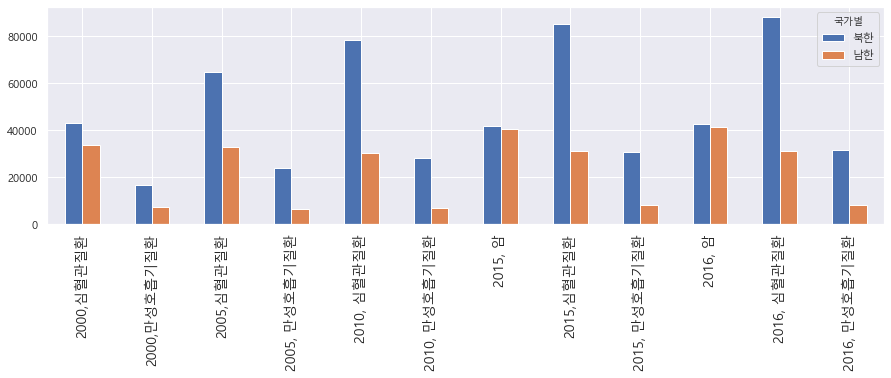

In [61]:
TT=T[T["북한"]>T["남한"]]
TT.plot(kind='bar', rot=0, figsize=(15,4))
plt.xticks(fontsize=14,rotation=90)

조금의 차이는 무시하기 위해 남한에 1.5를 곱해서 다시 결과를 보자

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


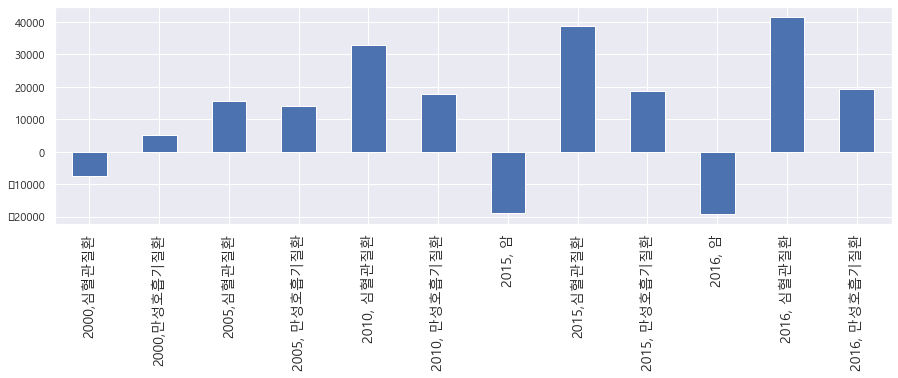

In [12]:
TTT=TT["북한"]-TT["남한"]*1.5
TTT.plot(kind='bar', rot=0, figsize=(15,4))
plt.xticks(fontsize=14,rotation=90)

## 북한은 한국보다 심혈관질환과 만성 호흡기 질환에서 사망률이 높다. 특히 심혈관질환에서 사망률이 아주 높다.

<!Doctype html>
<html>
<head>
<body>
     <div style="text-align:left"><font size="8" ,font color ="red", align= right> 왜??</font></div></body></head></html>

혹시 co2의 배출량이 폐질환과 상관이 있을까?

북한과 남한의 연간 co2배출량

No handles with labels found to put in legend.


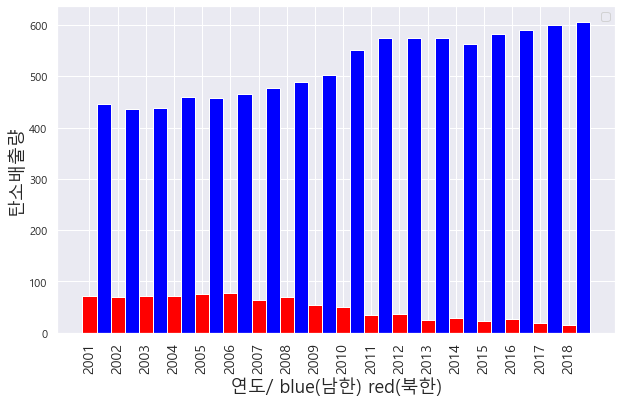

In [113]:
carbon=pd.read_csv("NKCO2.csv",encoding = "cp949",index_col=["시점"]).iloc[1:].astype(float)
carbonNK = carbon["북한"]
carbonSK = carbon["남한"]

w=0.5
plt.figure(figsize=(10,6))

xx1=np.arange(len(carbonNK))
xx2=np.arange(len(carbonSK))
year= ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
plt.xticks(fontsize=14, rotation=90)

plt.bar(xx1, carbonNK, color = 'red', width = w, align = 'center')
plt.bar(xx2+w, carbonSK, color='blue', width = w, align = 'center')
plt.xlabel('연도/ blue(남한) red(북한)', fontsize=18)

plt.ylabel('탄소배출량', fontsize=18)

plt.xticks(range(0,len(carbonSK)), year)

plt.grid(True)

북한과 남한의 1인당 co2배출량

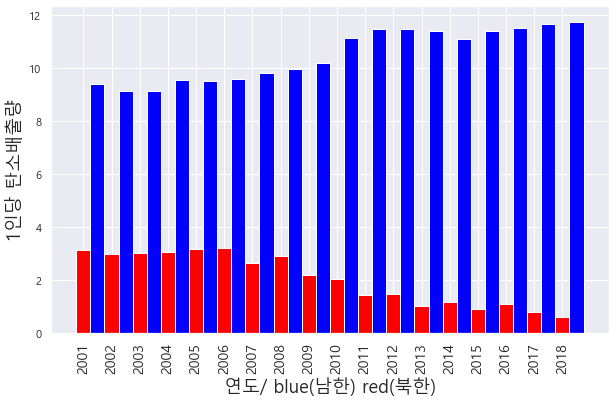

In [114]:
carbon=pd.read_csv("NKCO2.csv",encoding = "cp949",index_col=["시점"]).iloc[1:].astype(float)
carbon_personalNK = carbon["북한.1"]
carbon_personalSK = carbon["남한.1"]

w=0.5
plt.figure(figsize=(10,6))

xx1=np.arange(len(carbon_personalNK))
xx2=np.arange(len(carbon_personalSK))
year= ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
plt.xticks(fontsize=14, rotation=90)

plt.bar(xx1, carbon_personalNK, color = 'red', width = w, align = 'center')
plt.bar(xx2+w, carbon_personalSK, color='blue', width = w, align = 'center')


plt.xticks(range(0,len(carbon_personalNK)), year)
plt.xlabel('연도/ blue(남한) red(북한)', fontsize=18)

plt.ylabel('1인당 탄소배출량', fontsize=18)
plt.grid(True)

## 북한 사람들의 식생활은 어떨까? 잘못된 식생활로 인해 질병을 유발하지는 않았을까?

In [63]:
nuttr=pd.read_csv("새로운영양공급.csv",encoding="cp949",index_col="시점")
nuttr.head(10)


,남북한별,에너지 (Kcal),식물성 (Kcal),동물성 (Kcal),단백질 (g),식물성 (g),동물성 (g),지방질 (g),식물성 (g).1,동물성 (g).1
시점,,,,,,,,,,
2001,북한,2096,1953,143,58.87,49.03,9.85,35.39,24.51,10.88
2001,남한,3000,2538,462,98.30,53.60,44.70,83.90,58.20,25.60
2002,북한,2182,2022,159,62.11,51.75,10.36,37.43,25.00,12.43
2002,남한,2991,2515,477,98.50,52.60,45.80,85.20,58.70,26.50
2003,북한,2189,2040,150,59.42,49.78,9.64,36.55,24.82,11.73
2003,남한,2919,2452,467,97.60,51.50,46.10,83.10,57.50,25.60
2004,북한,2206,2054,152,60.27,50.57,9.70,37.45,25.65,11.80
2004,남한,2990,2524,466,99.40,52.70,46.70,85.80,60.70,25.10
2005,북한,2180,2024,156,59.19,49.05,10.14,37.00,24.93,12.06


전체 에너지 부분에서는 남한이 북한보다 크게 높은 kcal를 소비한다

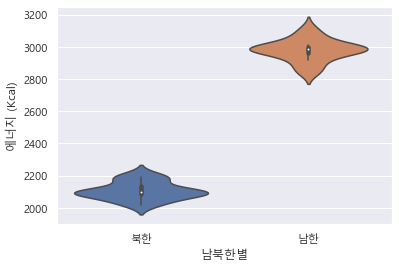

In [64]:
sns.violinplot(x="남북한별", y = "에너지 (Kcal)", data= nuttr)

남북한별로 pairplot을 그려보았는데 남한이 모든 부분의 영양소 부분에서 앞서있는 것을 확인할 수 있다.

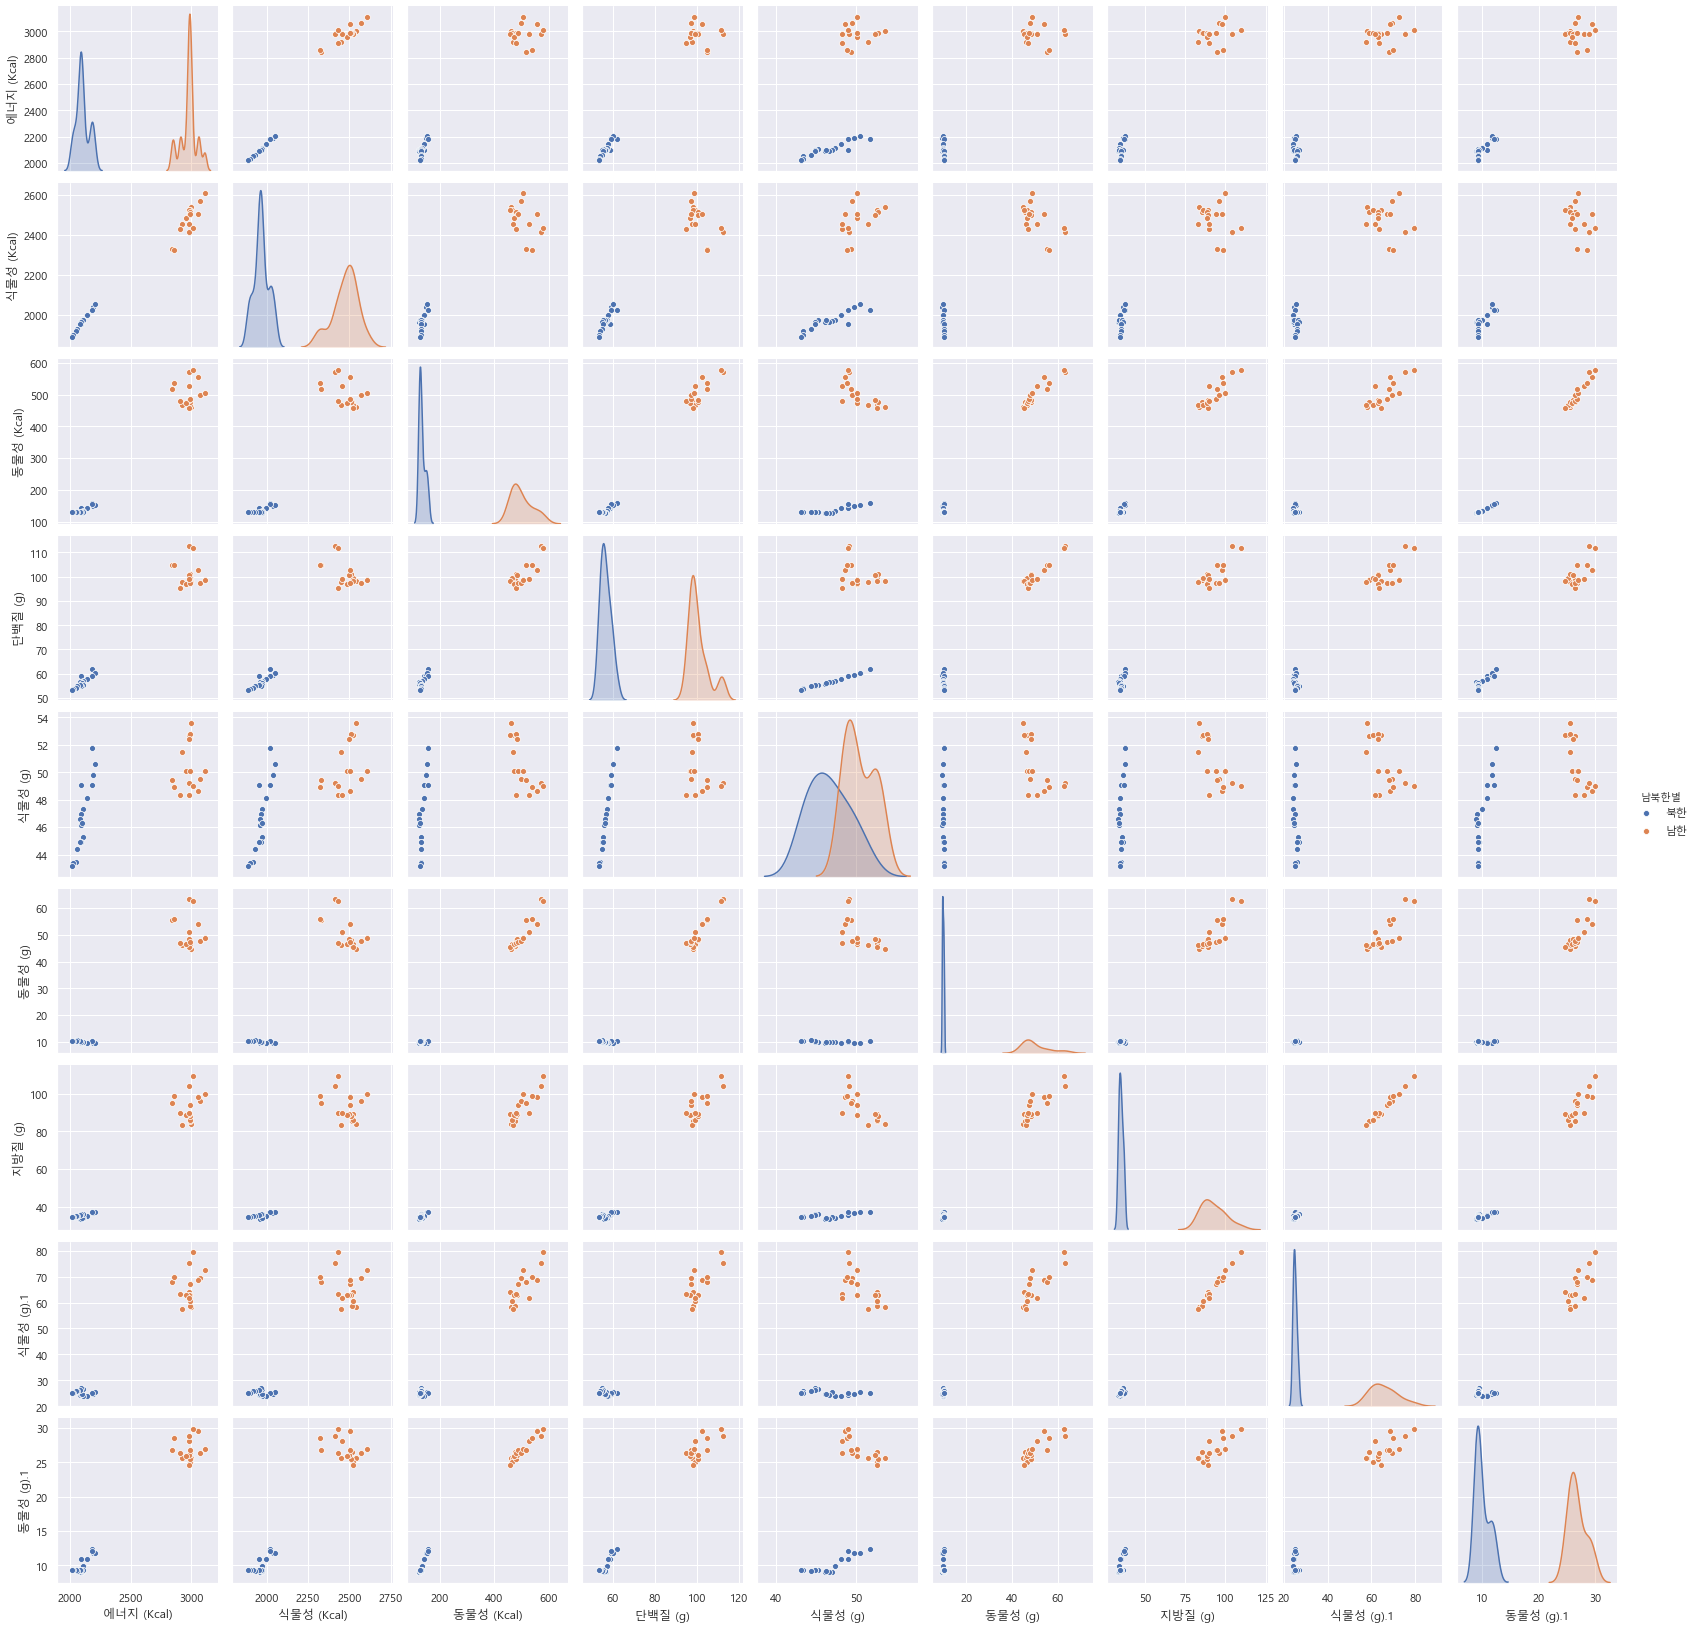

In [66]:
sns.pairplot(nuttr, hue='남북한별')



## 북한과 남한의 영양소 섭취의 차이가 심한 부분을 찾아보자.

## 처음 시도 했던 방법


막대 그래프를 그려서 비교를 해보자.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

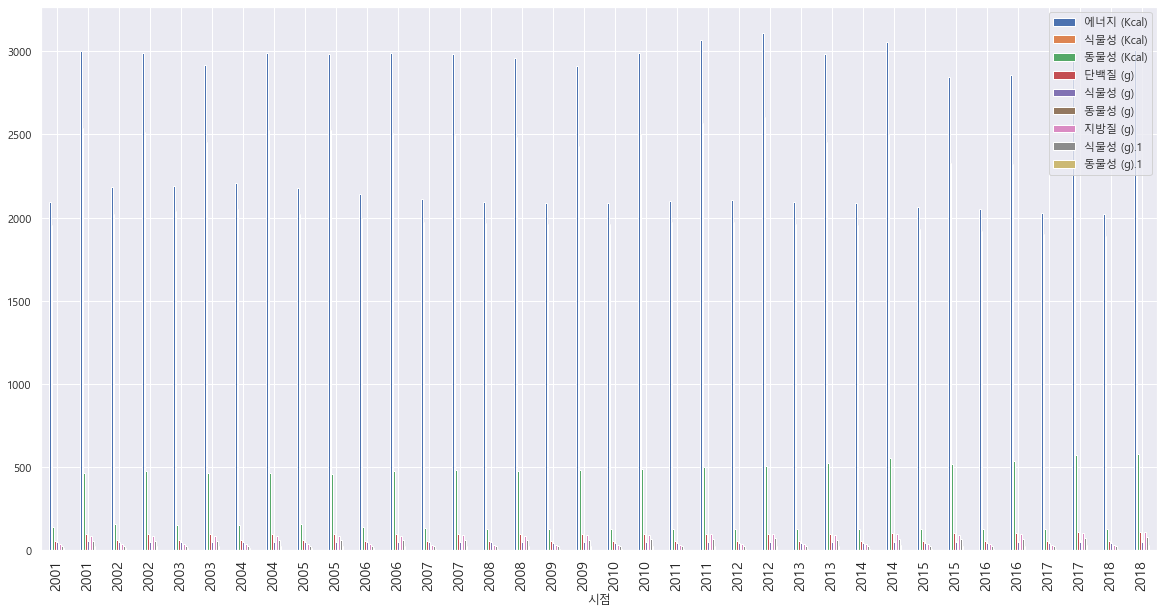

In [18]:
nuttr.plot(kind='bar',rot=0, figsize=(20,10))
plt.xticks(fontsize=14, rotation=90)

값이 너무 큰 부분은 빼고, 연도별로 쪼개서 보자.

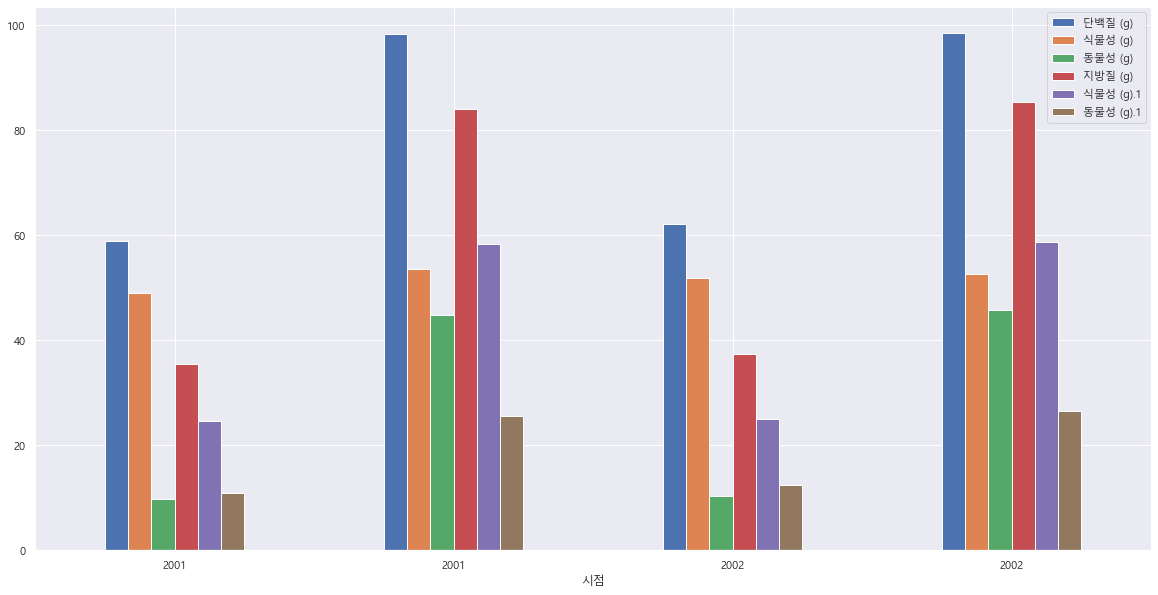

In [19]:
nuttr1=nuttr.iloc[0:4]
nuttr11=nuttr1.drop(['에너지 (Kcal)','식물성 (Kcal)','동물성 (Kcal)'], axis = 1)
nuttr11.plot(kind='bar', rot=0, figsize=(20,10))


그렇다면 평균과 표준편차를 구해보고, 표춘편차 값이 평균에 미치는 영향이 10%이내라면 그 값을 사용해보자!

In [67]:
Northkorea영양=nuttr.query("남북한별=='북한'")
Northkorea영양

,남북한별,에너지 (Kcal),식물성 (Kcal),동물성 (Kcal),단백질 (g),식물성 (g),동물성 (g),지방질 (g),식물성 (g).1,동물성 (g).1
시점,,,,,,,,,,
2001,북한,2096,1953,143,58.87,49.03,9.85,35.39,24.51,10.88
2002,북한,2182,2022,159,62.11,51.75,10.36,37.43,25.00,12.43
2003,북한,2189,2040,150,59.42,49.78,9.64,36.55,24.82,11.73
2004,북한,2206,2054,152,60.27,50.57,9.70,37.45,25.65,11.80
2005,북한,2180,2024,156,59.19,49.05,10.14,37.00,24.93,12.06
2006,북한,2141,1999,142,57.87,48.14,9.73,34.88,24.04,10.84
2007,북한,2109,1975,134,57.14,47.34,9.80,34.03,24.14,9.88
2008,북한,2095,1969,126,56.72,46.96,9.76,34.35,25.34,9.01
2009,북한,2088,1962,126,56.38,46.59,9.78,33.37,24.40,8.97


In [68]:
Northkorea영양.mean()

에너지 (Kcal)    2106.666667
식물성 (Kcal)    1970.333333
동물성 (Kcal)     136.277778
단백질 (g)         56.761111
식물성 (g)         46.727778
동물성 (g)         10.032778
지방질 (g)         35.307778
식물성 (g).1       25.258889
동물성 (g).1       10.048333
dtype: float64

In [69]:
Northkorea영양.std()

에너지 (Kcal)    53.885500
식물성 (Kcal)    45.152031
동물성 (Kcal)    11.049650
단백질 (g)        2.432517
식물성 (g)        2.565975
동물성 (g)        0.304936
지방질 (g)        1.259947
식물성 (g).1      0.842223
동물성 (g).1      1.212087
dtype: float64

In [70]:
(Northkorea영양.std()/Northkorea영양.mean())*100 ##동물성 (g).1은 따로 계산해야겠구먼

에너지 (Kcal)     2.557856
식물성 (Kcal)     2.291594
동물성 (Kcal)     8.108182
단백질 (g)        4.285535
식물성 (g)        5.491328
동물성 (g)        3.039397
지방질 (g)        3.568467
식물성 (g).1      3.334363
동물성 (g).1     12.062572
dtype: float64

In [71]:
Southkorea영양=nuttr.query("남북한별=='남한'")
Southkorea영양

,남북한별,에너지 (Kcal),식물성 (Kcal),동물성 (Kcal),단백질 (g),식물성 (g),동물성 (g),지방질 (g),식물성 (g).1,동물성 (g).1
시점,,,,,,,,,,
2001,남한,3000,2538,462,98.3,53.6,44.7,83.9,58.2,25.6
2002,남한,2991,2515,477,98.5,52.6,45.8,85.2,58.7,26.5
2003,남한,2919,2452,467,97.6,51.5,46.1,83.1,57.5,25.6
2004,남한,2990,2524,466,99.4,52.7,46.7,85.8,60.7,25.1
2005,남한,2983,2525,458,98.1,52.7,45.4,88.9,64.2,24.6
2006,남한,2989,2511,478,100.9,52.8,48.1,88.3,62.9,25.5
2007,남한,2981,2497,484,100.8,52.4,48.5,89.0,63.0,26.0
2008,남한,2957,2484,474,96.8,50.1,46.7,88.6,62.8,25.9
2009,남한,2909,2429,480,95.1,48.3,46.8,89.7,63.3,26.4


In [72]:
Southkorea영양.mean()

에너지 (Kcal)    2979.111111
식물성 (Kcal)    2478.222222
동물성 (Kcal)     501.111111
단백질 (g)        100.816667
식물성 (g)         50.544444
동물성 (g)         50.272222
지방질 (g)         92.622222
식물성 (g).1       65.766667
동물성 (g).1       26.838889
dtype: float64

In [73]:
Southkorea영양.std()

에너지 (Kcal)    66.408618
식물성 (Kcal)    74.271011
동물성 (Kcal)    37.930104
단백질 (g)        4.849773
식물성 (g)        1.815691
동물성 (g)        5.692596
지방질 (g)        7.254091
식물성 (g).1      6.046681
동물성 (g).1      1.541252
dtype: float64

In [74]:
(Southkorea영양.std()/Southkorea영양.mean())*100#동물성(g)은 따로 다시하기

에너지 (Kcal)     2.229142
식물성 (Kcal)     2.996947
동물성 (Kcal)     7.569200
단백질 (g)        4.810487
식물성 (g)        3.592265
동물성 (g)       11.323542
지방질 (g)        7.831912
식물성 (g).1      9.194143
동물성 (g).1      5.742607
dtype: float64

In [75]:
Northkorea영양1=Northkorea영양.drop(['동물성 (g)','동물성 (g).1'],axis=1)
Southkorea영양1=Southkorea영양.drop(['동물성 (g)','동물성 (g).1'],axis=1)

북한이 남한보다 잘 먹는 영양소는 없다.

In [29]:
Northkorea영양1>=Southkorea영양1

,남북한별,에너지 (Kcal),식물성 (Kcal),동물성 (Kcal),단백질 (g),식물성 (g),지방질 (g),식물성 (g).1
시점,,,,,,,,
2001,True,False,False,False,False,False,False,False
2002,True,False,False,False,False,False,False,False
2003,True,False,False,False,False,False,False,False
2004,True,False,False,False,False,False,False,False
2005,True,False,False,False,False,False,False,False
2006,True,False,False,False,False,False,False,False
2007,True,False,False,False,False,False,False,False
2008,True,False,False,False,False,False,False,False
2009,True,False,False,False,False,False,False,False


# 북한과 남한의 영양공급차이를 알아보자

남한값에서 북한값을 빼면서 구해되, 북한값에 수를 곱해가면서 북한이 남한보다 3배이상 못먹는 영양성분을 구해보자.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

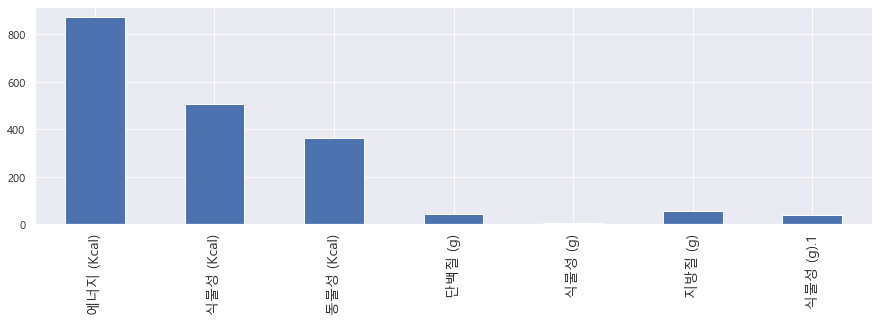

In [77]:
diff=Southkorea영양1.mean()-Northkorea영양1.mean()
diff.plot(kind='bar', rot=0, figsize=(15,4))
plt.xticks(fontsize=14,rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


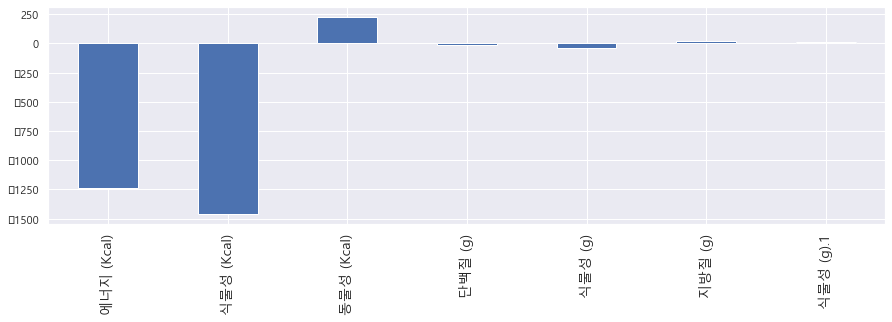

In [78]:
diff1=Southkorea영양1.mean()-Northkorea영양1.mean()*2
diff1.plot(kind='bar', rot=0, figsize=(15,4))
plt.xticks(fontsize=14,rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

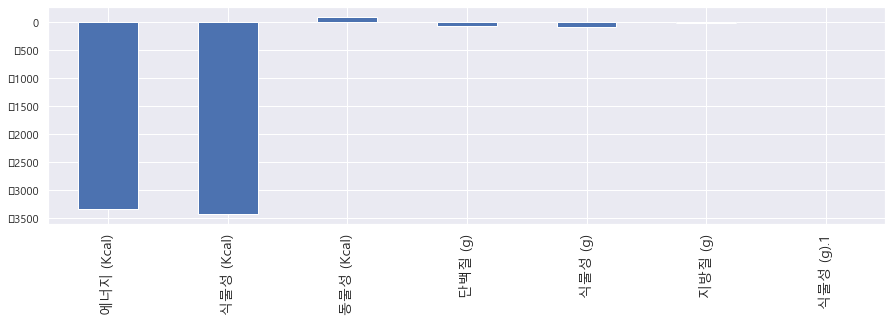

In [79]:
diff2=Southkorea영양1.mean()-Northkorea영양1.mean()*3
diff2.plot(kind='bar', rot=0, figsize=(15,4))
plt.xticks(fontsize=14,rotation=90)

## 북한은 전반적으로 다 섭취가 부족하지만 특히, 동물성 (Kcal)의 섭취가 북한이 남한보다 3배이상 부족하다.

## 아까 빼놓은  동물성 (g),동물성 (g).1에 대해서도 알아보자.

In [80]:
(Southkorea영양["동물성 (g)"]>Northkorea영양["동물성 (g)"]*4)##무려 4배를 곱해도 소비량이 남한이 더 많다.

시점
2001    True
2002    True
2003    True
2004    True
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
2016    True
2017    True
2018    True
Name: 동물성 (g), dtype: bool

In [81]:
(Southkorea영양["동물성 (g)"]>Northkorea영양["동물성 (g)"]*5)##5배부터 차이가 나기 시작한다.

시점
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013     True
2014     True
2015     True
2016     True
2017     True
2018     True
Name: 동물성 (g), dtype: bool

In [82]:
Southkorea영양["동물성 (g).1"]>Northkorea영양["동물성 (g).1"]*3 ##세배부터 나눠지기 시작하지만 최근에는 남한이 더 잘 먹고 있는 것으로 보여진다.

시점
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013     True
2014     True
2015    False
2016     True
2017     True
2018     True
Name: 동물성 (g).1, dtype: bool

## 북한은 남한보다 동물성 (g)(단백질),  동물성 (g).1(지방), 동물성(Kcal)의 섭취가 크게 부족하다. 아무래도 고기를 못 먹는것 같다.


전세계 수준으로 봤을 때, 북한의 영양부족 위치를 알아보자.

In [128]:
jj = pd.read_csv("NK영양부족.csv", encoding= "cp949",index_col="국가(2)")
jjj = jj.drop(["국가(1)"],axis=1)
world=jjj.T
world1 = world>world["북한"]
world1
#world1.T.sum()



,2014,2015,2016,2017,2018,가나,가봉,과테말라,그리스,나이지리아,...,파키스탄,페루,포르투갈,폴란드,프랑스,피지,핀란드,필리핀,한국,헝가리
2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 영양부족은 우리 몸의 면역력을 크게 낮춰서 여러 병들의 원인이 된다. 

https://www.voakorea.com/korea/korea-social-issues/3706200

영양분의 섭취가 부족하니 기대수명도 짧지 않을까?

In [86]:
lifetime=pd.read_csv("NK기대수명.csv", encoding= 'cp949', index_col="시점")
lifetime1=lifetime.iloc[1:].astype(float)
lifetimeNKmale=lifetime1["북한(B)"]
lifetimeSKmale=lifetime1["남한(A)"]
lifetimeSKfemale=lifetime1["남한(A).1"]
lifetimeNKfemale=lifetime1["북한(B).1"]

In [87]:
lifetime.iloc[1::]

,북한(B),북한(B).1,남한(A),남한(A).1,남한(A)-북한(B),남한(A)-북한(B).1
시점,,,,,,
2001,61.0,67.9,72.9,80.1,11.9,12.2
2002,61.4,68.4,73.4,80.3,12.0,11.9
2003,61.9,68.8,73.8,80.7,11.9,11.9
2004,62.4,69.3,74.3,81.2,11.9,11.9
2005,62.8,69.7,74.9,81.6,12.1,11.9
2006,63.3,70.1,75.4,82.1,12.1,12.0
2007,63.7,70.5,75.9,82.4,12.2,11.9
2008,64.1,71.0,76.2,83.0,12.1,12.0
2009,64.6,71.5,76.7,83.4,12.1,11.9


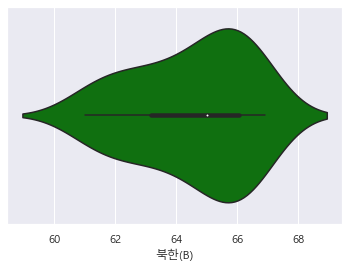

In [88]:
sns.violinplot(lifetimeNKmale, color = 'green')

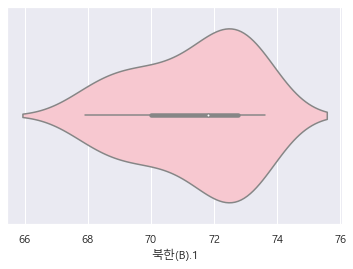

In [89]:
sns.violinplot(lifetimeNKfemale, color = 'pink')

In [90]:
(lifetimeSKmale-lifetimeNKmale).mean()

12.470

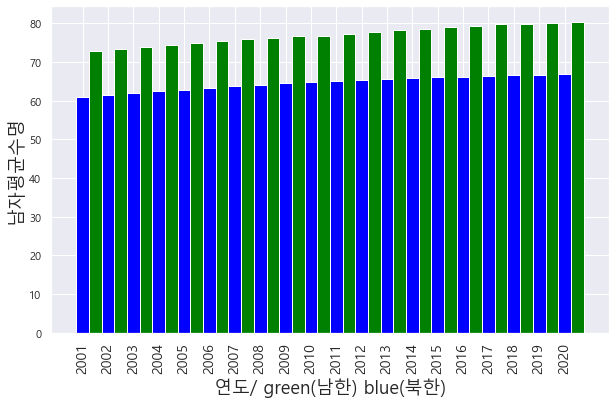

In [115]:
w=0.5
plt.figure(figsize=(10,6))

x1=np.arange(len(lifetimeNKmale))
x2=np.arange(len(lifetimeSKmale))
years= ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
plt.xticks(fontsize=14, rotation=90)

plt.bar(x1, lifetimeNKmale, color = 'blue', width = w, align = 'center')
plt.bar(x2+w, lifetimeSKmale, color='green', width = w, align = 'center')

plt.xlabel('연도/ green(남한) blue(북한)', fontsize=18)

plt.ylabel('남자평균수명', fontsize=18)
plt.xticks(range(0,len(lifetimeSKmale)), years)

plt.grid(True)

In [92]:
(lifetimeSKfemale-lifetimeNKfemale).mean()

12.160

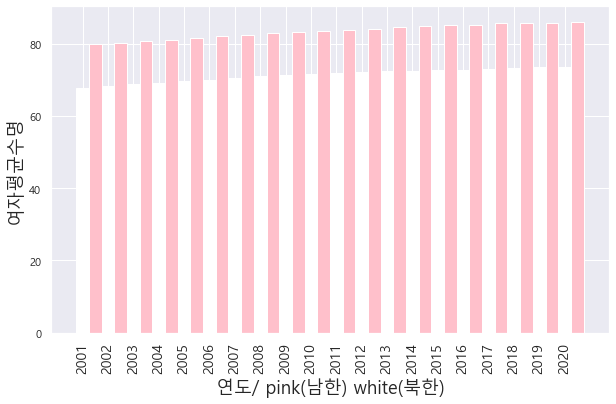

In [116]:
w=0.5
plt.figure(figsize=(10,6))

x1=np.arange(len(lifetimeNKfemale))
x2=np.arange(len(lifetimeSKfemale))
years= ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
plt.xticks(fontsize=14, rotation=90)

plt.bar(x1, lifetimeNKfemale, color = 'white', width = w, align = 'center')
plt.bar(x2+w, lifetimeSKfemale, color='pink', width = w, align = 'center')

plt.xlabel('연도/ pink(남한) white(북한)', fontsize=18)

plt.ylabel('여자평균수명', fontsize=18)
plt.xticks(range(0,len(lifetimeSKfemale)), years)

plt.grid(True)

In [129]:
growth=pd.read_csv("NK경제성장.csv",encoding="cp949",index_col=["시점"]).iloc[1:].astype(float)
growthperNK=growth["북한.1"]
growthperSK=growth["남한.1"]

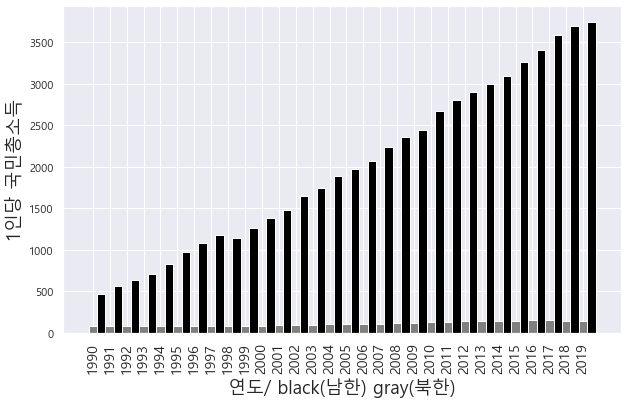

In [117]:

w=0.5
plt.figure(figsize=(10,6))

t1=np.arange(len(growthperNK))
t2=np.arange(len(growthperSK))
period= ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
plt.xticks(fontsize=14, rotation=90)

plt.bar(t1, growthperNK, color = 'gray', width = w, align = 'center')
plt.bar(t2+w, growthperSK, color='black', width = w, align = 'center')

plt.xlabel('연도/ black(남한) gray(북한)', fontsize=18)

plt.ylabel('1인당 국민총소득', fontsize=18)
plt.xticks(range(0,len(growthperNK)), period)

plt.grid(True)

,북한,북한.1,북한.2,남한,남한.1,남한.2
북한,1.000000,0.997933,0.319721,0.985499,0.984204,-0.540252
북한.1,0.997933,1.000000,0.300526,0.973472,0.971346,-0.522307
북한.2,0.319721,0.300526,1.000000,0.325533,0.338876,-0.194262
남한,0.985499,0.973472,0.325533,1.000000,0.999617,-0.560517
남한.1,0.984204,0.971346,0.338876,0.999617,1.000000,-0.563689
남한.2,-0.540252,-0.522307,-0.194262,-0.560517,-0.563689,1.000000


C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


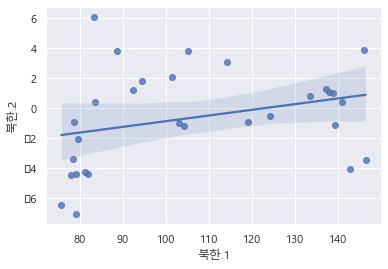

In [100]:
sns.regplot(data = growth, x = '북한.1', y = '북한.2')
growth.corr()

In [119]:
rateNK.mean()

-0.637

In [120]:
rateSK.mean()

5.183

Text(0, 0.5, '경제성장률')

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


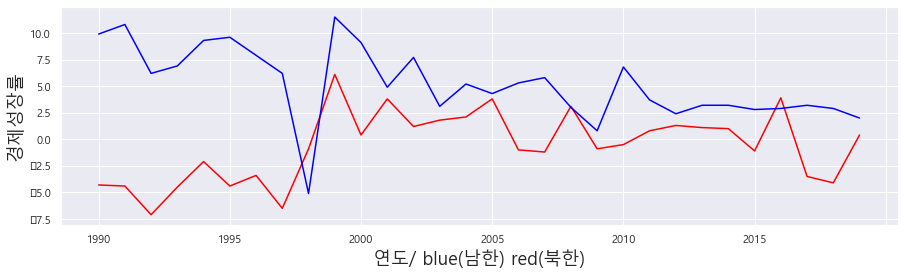

In [118]:
rateNK=growth["북한.2"]
rateSK=growth["남한.2"]
rateNK.plot(kind='line', rot=0, figsize=(15,4),color='red')
rateSK.plot(kind='line',rot=0,figsize=(15,4),color='blue')
plt.xlabel('연도/ blue(남한) red(북한)', fontsize=18)

plt.ylabel('경제성장률', fontsize=18)

# 탐구 요약
우선 북한과 남한의 인구수를 비교하여서 남한이 북한보다 몇배 더 많은지를 구하였다. 이는 나중에 그냥 숫자보다는 나라 별 인구에 따른 비율을 구하기 위해서 한 작업이다. 그 후 의사/약사수를 구해보아서, 북한의 의료 인구에 대해 파악해보고자 하였다. 또한 결핵 데이터를 통해서 북한이 얼마나 결핵에 대해서 잘 대비하는지를 알아보았다. 사실 결핵이란 병은 쉽게 치료를 할 수 있지만, 의료 접근성이 낮으면 치료를 받지 못해 큰 피해가 갈 수 있는 병이다. 북한이 결핵 같은 난이도 낮은 질병에 대해 얼마나 잘 대처하고 있는지 보고 싶어서 결핵에 대한 탐구를 진행해보았는데, 최근에 들어서는 북한도 결핵에 대해 잘 대비하고 있는 것 같았다. 그 다음은 북한의 질환병 사망 원인에 대해 조사해보았다. 사실 북한이 쉽게 치료할 수 있는 병인데 잘 대비하지 못해 혹시 피해를 보고 있는 질병이 있는지에 대해 찾아보고자 탐구를 진행한 것이었다. 하지만 뜻밖에, 북한은 심혈관질환과 폐질환에 대해 사망률이 높다는 것을 알았다. 이에 대해 궁금증을 가지고 폐질환에 연관될 수 있는 co2 소비율을 알아보았고, 심혈관질환은 영양소 부족과 관련해서 조사를 해보았다. 조사를 해본 결과 북한의 c02소비 비율은 적었으나, 심각한 영양실조를 보였고, 특히 육류 섭취에 대해 아주 빈약한 결과를 보였다. 이런 영양 섭취 부족에 따라 북한의 기대 수명도 짧을 것 같아서, 기대 수명도 조사했더니, 영양실조가 원인인지 기대수명도 남한에 비해 10년 이상 짧은 수치를 보였다. 마지막으로 경제 성장률과 1인당 평균 소득량을 비교해본 결과, 경제 성장률의 평균은 음의 값을 가졌으며, 1인당 평균 소득률 또한 남한에 비해 턱없이 적은 수치를 가지고 있었다. 이번 탐구는 처음부터 다 정해서 진행해본 것이 아니라, 탐구를 해나가면서 궁금증이 생기면서 계속 꼬리에  꼬리를 물고, 내용을 바꾸어가본 탐구였다.

# 최종 결론

## 북한의 삶은 힘든 것 같다. 북한은 최근에 들어서 결핵에 대한 예방률은 높아지고 있는 것이 사실이다. 또한 의사/약사수도 의료 시설이 잘 발달되어있는 남한에 비교해서 절대 적은 수치는 아니었다. 하지만 국민들의 영양 상태는 세계 최악의 수준이었고, 다른 나라들에 비해 심혈관질환과 폐질환에 대한 사망률이 높았다. 또한 경제 성장률 또한 0에 가까운 수치였으며, 국민들의 1인당 소득량도 남한에 비해 비교 될 정도가 아니었다. 비록 모든 데이터들을 종합적으로 판단하여 그들의 삶을 100프로 확실하게 평가해볼 수 는 없었지만, 어느 정도의 지표로 평가해본 결과 그리 좋지 않은 삶인 것은 맞는 것 같다.